In [1]:
%load_ext autoreload
%autoreload 2
import os
# Set environment variables
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".99"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import jax
# from jax import config
# config.update('jax_enable_x64', True)

# Check JAX configuration
devices = jax.local_devices()
print(devices)
print(jax.default_backend())
print(jax.devices())

import sys
# Add custom path
sys.path.append("/pchem-data/meuwly/boittier/home/pycharmm_test/src")

# from model import EF
# from loss import dipole_calc
# from  training import train_model # from model import dipole_calc
import jax
import optax
import e3x

# from dcmnet.analysis import create_model_and_params
# from data import prepare_batches, prepare_datasets
import numpy as np

import orbax
from orbax.checkpoint import PyTreeCheckpointer
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

[CudaDevice(id=0)]
gpu
[CudaDevice(id=0)]


In [71]:
from pathlib import Path

# path = Path("/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/adp-1c07d6ad-7a43-4cf6-afd2-f9c76ff0ce7b")
path = Path("/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/aaa-ec3e940b-642e-4558-b670-a3c10bb33176")
# path = Path("/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/test-4fd66a4e-1c54-484e-a7b6-52fca8cb23d3")
path = Path("/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/aaa1-0b2547d6-a0b2-4c0e-be28-555f40de9bd2")

In [72]:
files = list(path.glob("*"))
files.sort()

In [73]:
# from orbax.checkpoint import PyTreeRestoreArgs

# restore_args = PyTreeRestoreArgs()  # Adjust arguments as needed
# restored = orbax_checkpointer.restore(path / "epoch-1", args=restore_args)
epochs = []
lr_effs = []
restored_objectives = []

for _ in files[::]:
    re = orbax_checkpointer.restore(_)
    epochs.append(int(re["epoch"]))
    lr_effs.append(float(re["lr_eff"]))
    restored_objectives.append(re["objectives"])


/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


In [74]:
import pandas as pd

df = pd.DataFrame({"epoch": epochs, 
             "lr": lr_effs,
             "train_energy_mae": [float(_["train_energy_mae"]) for _ in restored_objectives],
             "train_forces_mae": [float(_["train_forces_mae"]) for _ in restored_objectives],
              "valid_energy_mae": [float(_["valid_energy_mae"]) for _ in restored_objectives],
              "valid_forces_mae": [float(_["valid_forces_mae"]) for _ in restored_objectives],
             })

,epoch,lr,train_energy_mae,train_forces_mae,valid_energy_mae,valid_forces_mae
0,1,0.001,1883.957764,25.223841,3043.262695,25.167791
11,2,0.001,111.628258,16.591801,2993.362061,25.146465
22,3,0.001,87.727455,12.681700,2865.803223,25.037954
23,4,0.001,111.633614,10.989850,2630.997314,24.737431
24,5,0.001,112.477974,10.129007,2323.153076,24.188023
25,6,0.001,105.675690,9.295423,2004.322876,23.548199
26,7,0.001,150.916138,9.082865,1708.292725,23.119593
27,8,0.001,183.975555,9.380587,1447.210815,22.597843
28,9,0.001,145.768860,8.960585,1210.783447,22.019152
1,10,0.001,79.212585,8.257689,995.328369,21.306299


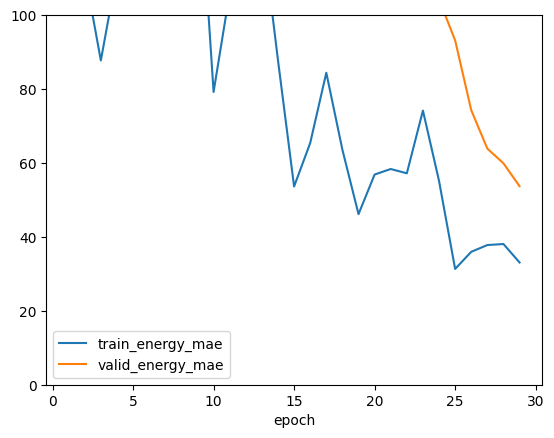

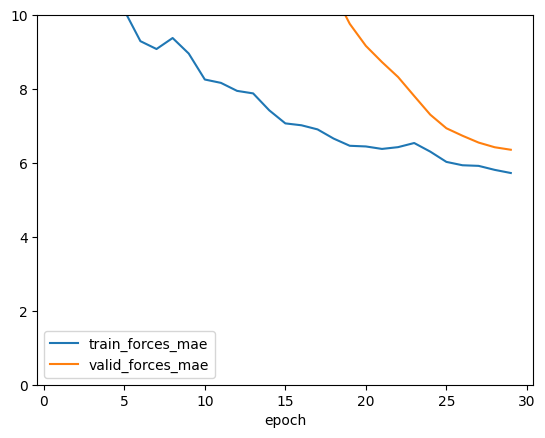

In [75]:
df = df.sort_values(by="epoch")
import matplotlib.pyplot as plt
df.plot("epoch", ["train_energy_mae", "valid_energy_mae"])
plt.ylim(0,100)
df.plot("epoch", ["train_forces_mae", "valid_forces_mae"])
plt.ylim(0,10)
df

In [138]:
from orbax.checkpoint.metadata import StringMetadata
from orbax.checkpoint import PyTreeCheckpointer
import orbax.checkpoint as ocp
import jax
from jax.sharding import SingleDeviceSharding

# Initialize checkpointer
orbax_checkpointer = PyTreeCheckpointer()

# Get metadata
metadata = orbax_checkpointer.metadata(path / "epoch-1")

# Create a CPU-compatible structure
cpu_device = jax.devices("cpu")[0]
sharding = SingleDeviceSharding(cpu_device)
print(sharding)

def create_shape_dtype_struct(x):
    from orbax.checkpoint.metadata.value import StringMetadata, ScalarMetadata

    if isinstance(x, jax.ShapeDtypeStruct):
        # print(x)
        return jax.ShapeDtypeStruct(shape=x.shape, dtype=x.dtype, sharding=sharding)
        
    elif isinstance(x, ScalarMetadata):
        # Handle ScalarMetadata as scalars
        return jax.ShapeDtypeStruct(shape=(), dtype=jax.numpy.float32, sharding=sharding)
    
    elif isinstance(x, StringMetadata):
        # Replace StringMetadata with its value or a placeholder
        return jax.ShapeDtypeStruct(shape=(), dtype=jax.numpy.float32, sharding=sharding)
        
    elif hasattr(x, 'shape') and hasattr(x, 'dtype'):
        return jax.ShapeDtypeStruct(shape=x.shape, dtype=x.dtype, sharding=sharding)
    
    else:
        raise ValueError(f"Unsupported metadata type: {type(x)}")


def wrap(x):
    o = create_shape_dtype_struct(x)
    if o.sharding is None:
        print(o)
    return o

item = jax.tree.map(wrap, metadata)

# Restore the checkpoint
# restored = orbax_checkpointer.restore(path / "epoch-1", item=item)



SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)


In [143]:
item.keys()
_item = {"objectives": item["objectives"]}
_item

{'objectives': {'train_energy_mae': ShapeDtypeStruct(shape=(), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)),
  'train_forces_mae': ShapeDtypeStruct(shape=(), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)),
  'train_loss': ShapeDtypeStruct(shape=(), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)),
  'valid_energy_mae': ShapeDtypeStruct(shape=(), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)),
  'valid_forces_mae': ShapeDtypeStruct(shape=(), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)),
  'valid_loss': ShapeDtypeStruct(shape=(), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host))}}

In [151]:
from flax.training import orbax_utils

ckptr = orbax.checkpoint.Checkpointer(orbax.checkpoint.PyTreeCheckpointHandler())  # A stateless object, can be created on the fly.
# ckptr.save(PURE_CKPT_DIR, CKPT_PYTREE,
#            save_args=flax.training.orbax_utils.save_args_from_target(CKPT_PYTREE), force=True)
ckptr.restore(path / "epoch-1", item=item,
              # restore_args=item,
              restore_args=flax.training.orbax_utils.restore_args_from_target(item, mesh=None)
             )

ValueError: NOT_FOUND: Error opening "cast" driver: Error opening "zarr" driver: Metadata at "model_attributes.zbl/.zarray" in OCDBT database at local file "/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/aaa-ec3e940b-642e-4558-b670-a3c10bb33176/epoch-1/" does not exist [tensorstore_spec[1]='{\"base\":{\"driver\":\"zarr\",\"kvstore\":{\"base\":{\"driver\":\"file\",\"path\":\"/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/aaa-ec3e940b-642e-4558-b670-a3c10bb33176/epoch-1/\"},\"cache_pool\":\"cache_pool#ocdbt\",\"driver\":\"ocdbt\",\"experimental_read_coalescing_interval\":\"1ms\",\"experimental_read_coalescing_merged_bytes\":500000000000,\"experimental_read_coalescing_threshold_bytes\":1000000,\"path\":\"model_attributes.zbl/\"},\"recheck_cached_data\":false,\"recheck_cached_metadata\":false},\"context\":{\"cache_pool\":{},\"cache_pool#ocdbt\":{\"total_bytes_limit\":100000000},\"data_copy_concurrency\":{},\"file_io_concurrency\":{\"limit\":128},\"file_io_sync\":true,\"ocdbt_coordinator\":{}},\"driver\":\"cast\",\"dtype\":\"float32\"}'] [source locations='tensorstore/driver/kvs_backed_chunk_driver.cc:1287\ntensorstore/driver/driver.cc:117\ntensorstore/driver/driver.cc:117'] [tensorstore_spec='{\"context\":{\"cache_pool\":{},\"cache_pool#ocdbt\":{\"total_bytes_limit\":100000000},\"data_copy_concurrency\":{},\"file_io_concurrency\":{\"limit\":128},\"file_io_sync\":true,\"ocdbt_coordinator\":{}},\"driver\":\"zarr\",\"kvstore\":{\"base\":{\"driver\":\"file\",\"path\":\"/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/aaa-ec3e940b-642e-4558-b670-a3c10bb33176/epoch-1/\"},\"cache_pool\":\"cache_pool#ocdbt\",\"driver\":\"ocdbt\",\"experimental_read_coalescing_interval\":\"1ms\",\"experimental_read_coalescing_merged_bytes\":500000000000,\"experimental_read_coalescing_threshold_bytes\":1000000,\"path\":\"model_attributes.zbl/\"},\"recheck_cached_data\":false,\"recheck_cached_metadata\":false}']

In [99]:
abstract_state = jax.tree_util.tree_map(ocp.utils.to_shape_dtype_struct, item)
abstract_state

{'best_loss': ShapeDtypeStruct(shape=(), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)),
 'ema_params': {'params': {'Dense_0': {'0+': {'bias': ShapeDtypeStruct(shape=(128,), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)),
     'kernel': ShapeDtypeStruct(shape=(128, 128), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host))},
    '1-': {'kernel': ShapeDtypeStruct(shape=(128, 128), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host))}},
   'Dense_1': {'0+': {'bias': ShapeDtypeStruct(shape=(128,), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)),
     'kernel': ShapeDtypeStruct(shape=(128, 128), dtype=float32, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host))},
    '1-': {'kernel': ShapeDtypeStruct(shape=(128, 128), dtype=flo

In [120]:
# ckptr = ocp.AsyncCheckpointer(ocp.PyTreeCheckpointHandler())
# ocp.PyTreeCheckpointHandler().restore(path / "epoch-1", args=item)
restored = orbax_checkpointer.restore(path / "epoch-1", args=composite_args)


AttributeError: 'CompositeArgs' object has no attribute 'item'

In [86]:
mngr = ocp.CheckpointManager(path)

In [88]:
dir(mngr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__contextmanager__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__protocol_attrs__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_checkpoint_info',
 '_blocking_checkpoint_metadata_store',
 '_checkpoint_deleter',
 '_checkpointer',
 '_checkpoints',
 '_cleanup_tmp_directories',
 '_configure_checkpointer_common',
 '_configure_checkpointer_from_handler_registry',
 '_configure_checkpointer_from_item_names_and_handlers',
 '_configure_checkpointer_legacy_init',
 '_create_thread_safe_barrier_sync_fn',
 '_directory',
 '_finalize',
 '_f

In [121]:
mngr.restore("epoch-10", args=composite_args)

KeyError: 'Item "best_loss" was not found in the checkpoint. Available items: [\'ocdbt.process_0\', \'d\']'

In [107]:
from orbax.checkpoint import args

# Assuming `abstract_state` is a dictionary of objects to restore
composite_args = args.Composite(**abstract_state)

In [159]:
len(abstract_state)
rstargs = {}
for k in abstract_state.keys():
    if isinstance(abstract_state[k], dict):
        _ = { v: ocp.ArrayRestoreArgs(dtype=np.dtype(np.int16), sharding=sharding)
                  for v in abstract_state[k].keys()}
    else:
        _ = { k: ocp.ArrayRestoreArgs(dtype=np.dtype(np.int16), sharding=sharding)}
    rstargs[k] = _



In [160]:
rstargs

{'best_loss': {'best_loss': ArrayRestoreArgs(restore_type=<class 'jax.Array'>, dtype=dtype('int16'), mesh=None, mesh_axes=None, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host), global_shape=None)},
 'ema_params': {'params': ArrayRestoreArgs(restore_type=<class 'jax.Array'>, dtype=dtype('int16'), mesh=None, mesh_axes=None, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host), global_shape=None)},
 'epoch': {'epoch': ArrayRestoreArgs(restore_type=<class 'jax.Array'>, dtype=dtype('int16'), mesh=None, mesh_axes=None, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host), global_shape=None)},
 'lr_eff': {'lr_eff': ArrayRestoreArgs(restore_type=<class 'jax.Array'>, dtype=dtype('int16'), mesh=None, mesh_axes=None, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host), global_shape=None)},
 'model': {'opt_state': ArrayRestoreArgs(restore_type=<class 'jax.Array'>, dtype=dtype('int1

In [161]:
ckptr = ocp.AsyncCheckpointer(ocp.PyTreeCheckpointHandler())

In [162]:
ckptr.restore(
    path / 'epoch-1',
    args=ocp.args.PyTreeRestore(
        restore_args=rstargs
    ),
)

ValueError: Expected dict, got ArrayRestoreArgs(restore_type=<class 'jax.Array'>, dtype=dtype('int16'), mesh=None, mesh_axes=None, sharding=SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host), global_shape=None).